# task 1 : Exploratory Data Analysis on Dataset - Terrorism

#### Level:Intermediate

##### Author Gaurav Daple

Dataset: https://bit.ly/2TK5Xn5

In [98]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings("ignore")

In [99]:
#Loading Dataset

df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

In [100]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [101]:
#Changing the colum names 
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [102]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [103]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [104]:
df.head(5)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [105]:
df.tail(5)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [106]:
#Performing EDA on the Dataset

df.shape

(181691, 18)

In [107]:
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [108]:
#Combine Colums
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [109]:
df['Casualities'] = df['kill'] + df['Wound']
df.isnull().sum()

Year                0
Month               0
day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
Attacktype          0
kill                0
Wound               0
target1           636
summary         66129
Group               0
Targettype          0
Weapon              0
motive         131130
Casualities         0
dtype: int64

In [110]:
#Droping the unwanted columns

df.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)


In [111]:
df.info

<bound method DataFrame.info of         Year  Month  day             Country            State  \
0       1970      7    2  Dominican Republic              NaN   
1       1970      0    0              Mexico          Federal   
2       1970      1    0         Philippines           Tarlac   
3       1970      1    0              Greece           Attica   
4       1970      1    0               Japan          Fukouka   
...      ...    ...  ...                 ...              ...   
181686  2017     12   31             Somalia  Middle Shebelle   
181687  2017     12   31               Syria         Lattakia   
181688  2017     12   31         Philippines      Maguindanao   
181689  2017     12   31               India          Manipur   
181690  2017     12   31         Philippines      Maguindanao   

                             Region           City  \
0       Central America & Caribbean  Santo Domingo   
1                     North America    Mexico city   
2                    Sout

In [112]:
df.describe()

,Year,Month,day,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


In [113]:
#Data Visualization

attack = df.Country.value_counts()[:5]
attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

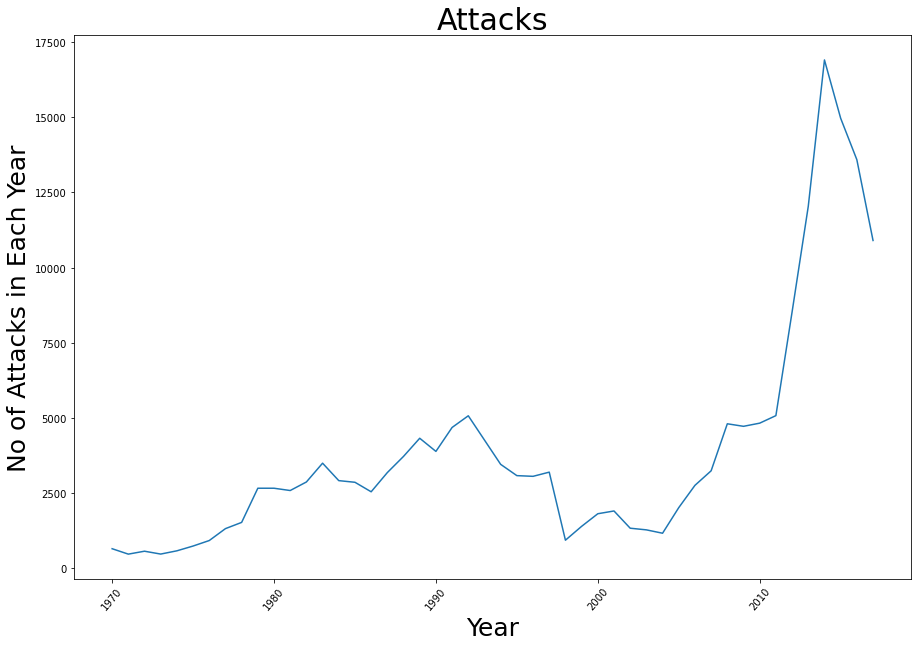

In [114]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,10))
sns.lineplot(x = year,
           y = years_count,
           palette = "magma")
plt.xticks(rotation = 50)
plt.xlabel('Year',fontsize=25)
plt.ylabel('No of Attacks in Each Year',fontsize=25)
plt.title('Attacks',fontsize=30)
plt.show()

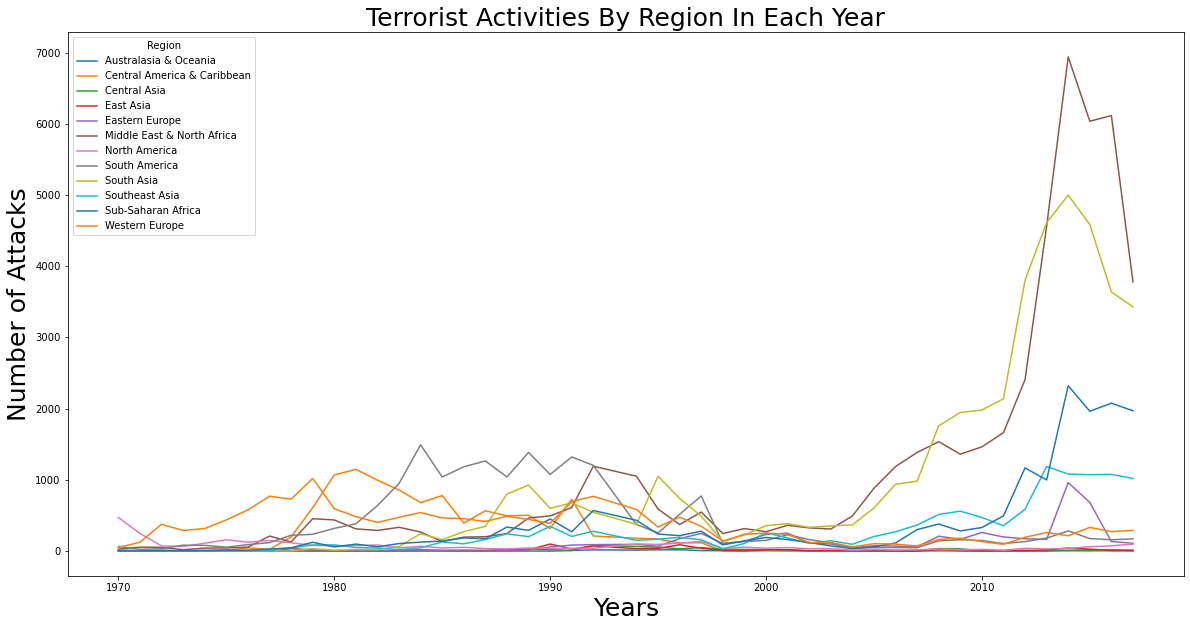

In [115]:
pd.crosstab(df.Year, df.Region).plot(kind='line',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.show()

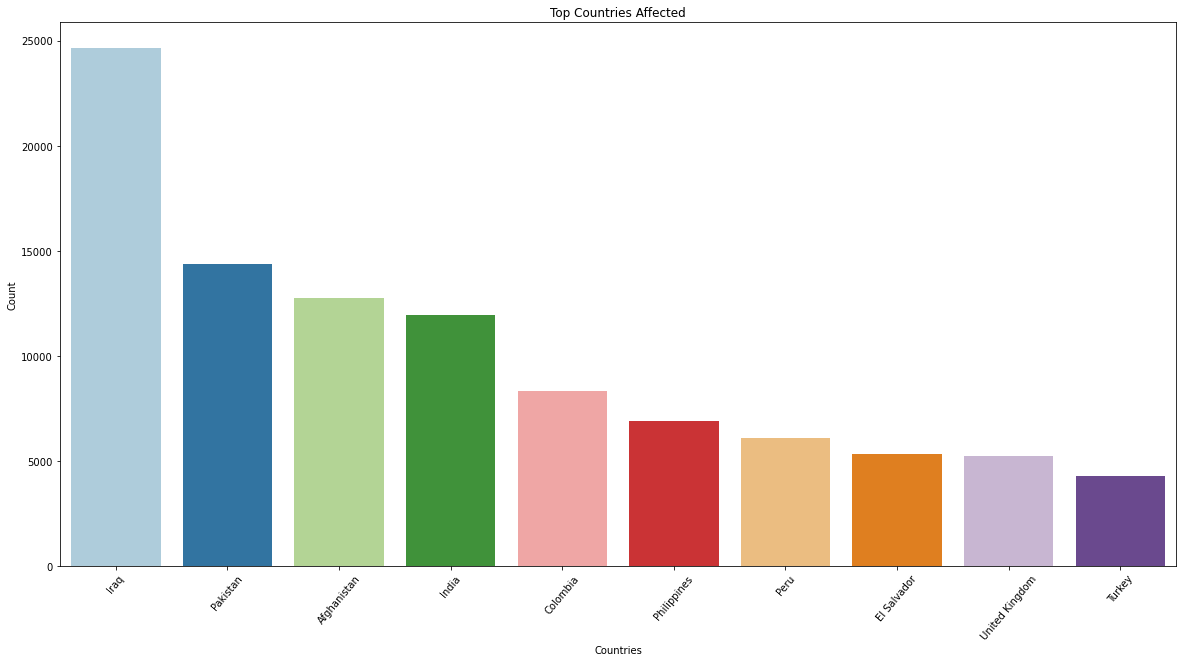

In [123]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette="Paired")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

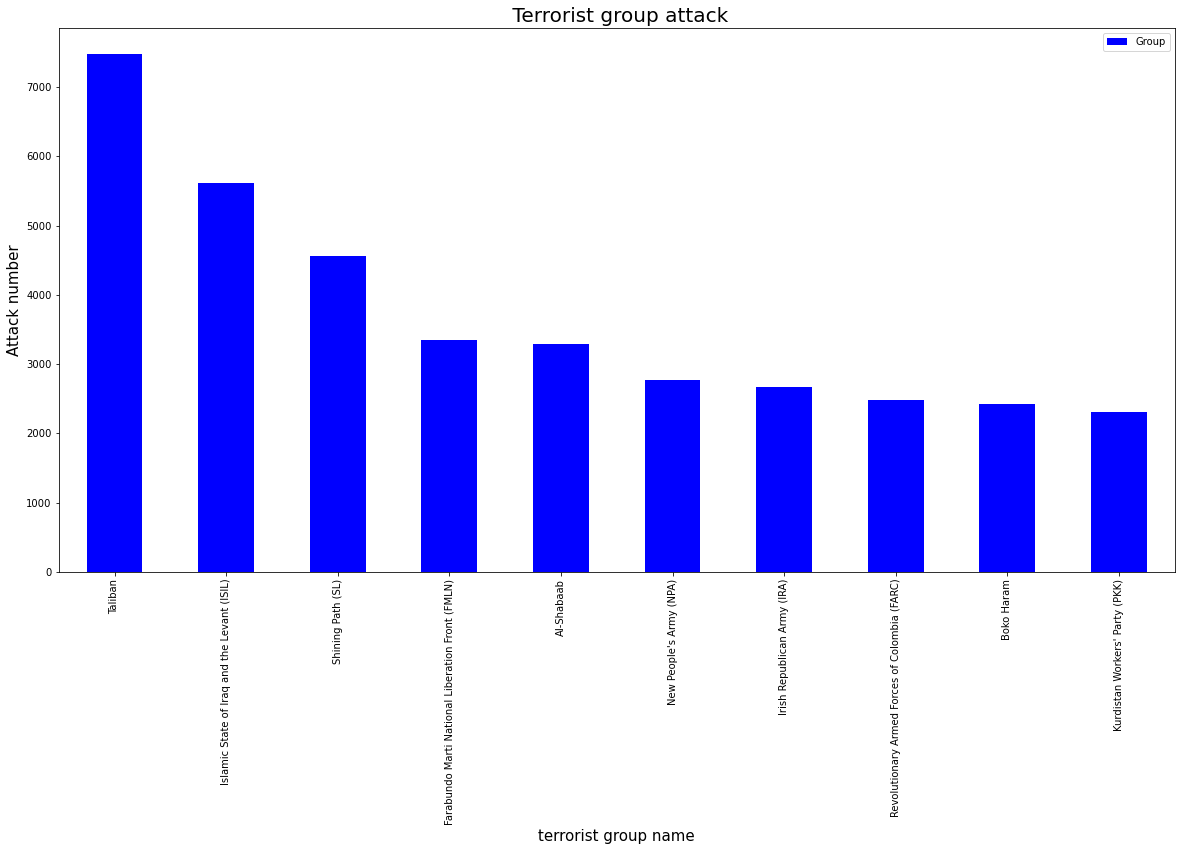

In [124]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='blue',figsize=(20,10))
plt.title(" Terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

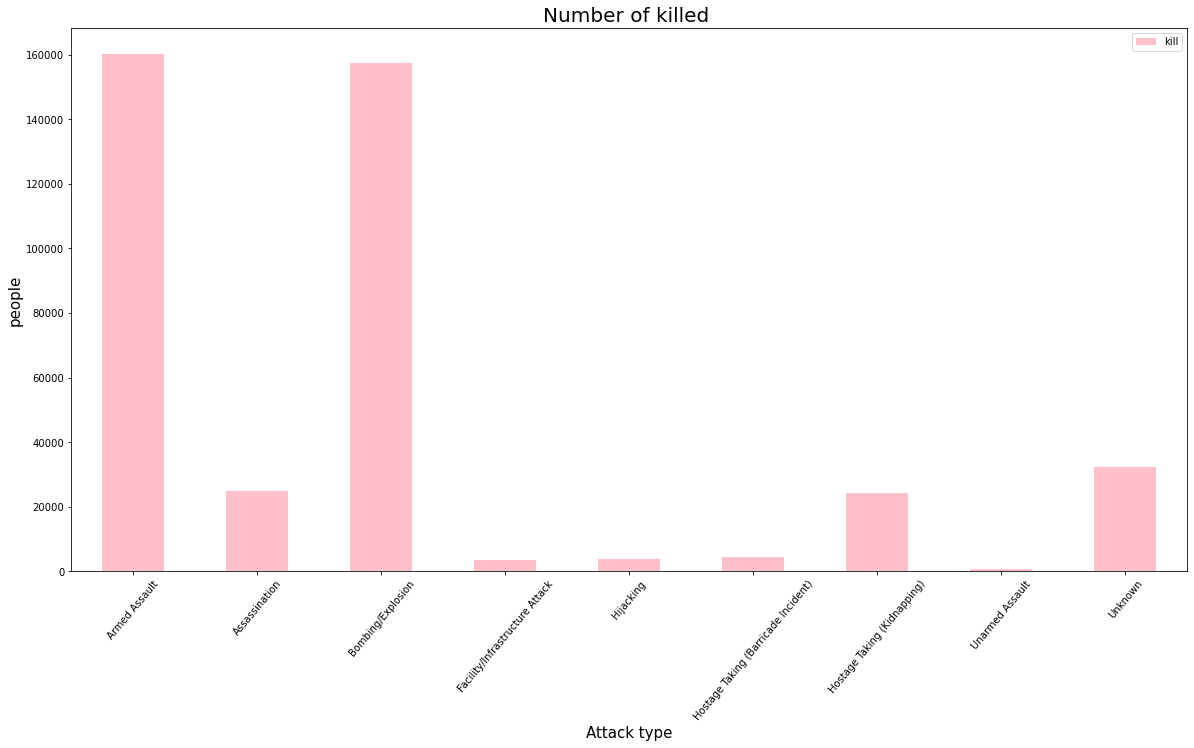

In [125]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="Pink")
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

In [ ]:
#Conclusion
Most people killed by armed assault and bombs/explosives

The most attacked country is Iraq.

The most terriorist attacks perform by Taliban.
